In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
URL_path = r"C:\Users\ANASTASIA\Desktop\Housing_Landlord-Tenant_Disputes_20240525.csv"

In [3]:
housing_disputes = pd.read_csv(URL_path)

In [4]:
housing_disputes.head()

,Case Number,City,Zip,Date Filed,Date Closed,Case Type,Type of Complaint,Case Disposition,Location
0,48204,GAITHERSBURG,20877,07/05/2023,07/07/2023,OLTA-LSF,Quit and Vacate,Referred to a MD State Government agency,"GAITHERSBURG 20877\n(39.14186, -77.19651)"
1,48121,CLARKSBURG,20871,05/18/2023,06/16/2023,OLTA-TMF,Quit and Vacate,Service performed or corrected,"CLARKSBURG 20871\n(39.2308882, -77.2510824)"
2,48153,SILVER SPRING,20906,06/07/2023,07/17/2023,OLTA-TMF,Quit and Vacate,Complaint withdrawn,"SILVER SPRING 20906\n(39.0679087, -77.0683461)"
3,48079,ROCKVILLE,20850,04/21/2023,07/13/2023,OLTA-TSF,Rent Increase,Settlement Agreement,"ROCKVILLE 20850\n(39.08509, -77.150695)"
4,48133,ROCKVILLE,20852,05/25/2023,07/25/2023,OLTA-TMF,Security Deposit,Settlement Agreement,"ROCKVILLE 20852\n(39.056520000000035, -77.1141..."


In [5]:
housing_disputes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11282 entries, 0 to 11281
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Case Number        11282 non-null  int64 
 1   City               11268 non-null  object
 2   Zip                11264 non-null  object
 3   Date Filed         11282 non-null  object
 4   Date Closed        11278 non-null  object
 5   Case Type          11282 non-null  object
 6   Type of Complaint  11148 non-null  object
 7   Case Disposition   11282 non-null  object
 8   Location           11282 non-null  object
dtypes: int64(1), object(8)
memory usage: 793.4+ KB


In [6]:
# Checking for null values in my dataframe

Null_value = housing_disputes.isnull().sum()
print(Null_value)

Case Number            0
City                  14
Zip                   18
Date Filed             0
Date Closed            4
Case Type              0
Type of Complaint    134
Case Disposition       0
Location               0
dtype: int64


In [7]:
# Calculating the percentage of the null values to aid in my final decision.

Null_percentage = housing_disputes.isnull().mean() * 100

Null_percentage_formatted = Null_percentage.apply(lambda x: f"{x:.2f}%")

print(Null_percentage_formatted)

Case Number          0.00%
City                 0.12%
Zip                  0.16%
Date Filed           0.00%
Date Closed          0.04%
Case Type            0.00%
Type of Complaint    1.19%
Case Disposition     0.00%
Location             0.00%
dtype: object


In [8]:
# Since the percentage is very low and can't make a significant impact in my final analysis, I'm going to delete them.

housing_disputes.dropna(inplace = True)

In [9]:
# Checking for duplicate values. There's none.

duplicates = housing_disputes.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
11277    False
11278    False
11279    False
11280    False
11281    False
Length: 11126, dtype: bool


In [10]:
# Renaming the zip column to zip code for more clarity

housing_disputes.rename({'Zip': 'Zip Code'}, inplace = True)

In [11]:
housing_disputes['City'] = housing_disputes['City'].str.lower()

In [12]:
housing_disputes.describe()

,Case Number
count,11126.000000
mean,37588.223530
std,5378.555684
min,29226.000000
25%,33218.250000
50%,36084.500000
75%,40971.750000
max,49147.000000


**Data Analysis And Visualization:**
    
With our visualization, we'll uncover these:
1. What are the most common types of complaints?
2. How are the cases distributed across different cities? 
3. Distribution of cases across top 5 cities
4. What are the most common case dispositions?
5. How has the number of cases changed over time?
6. Average case duration by case type
7. Overall average duration

In [13]:
# Before we do the visualization, let's covert our date columns to datatime

housing_disputes['Date Filed'] = pd.to_datetime(housing_disputes['Date Filed'], format = '%m/%d/%Y')
housing_disputes['Date Closed'] = pd.to_datetime(housing_disputes['Date Closed'], format = '%m/%d/%Y')

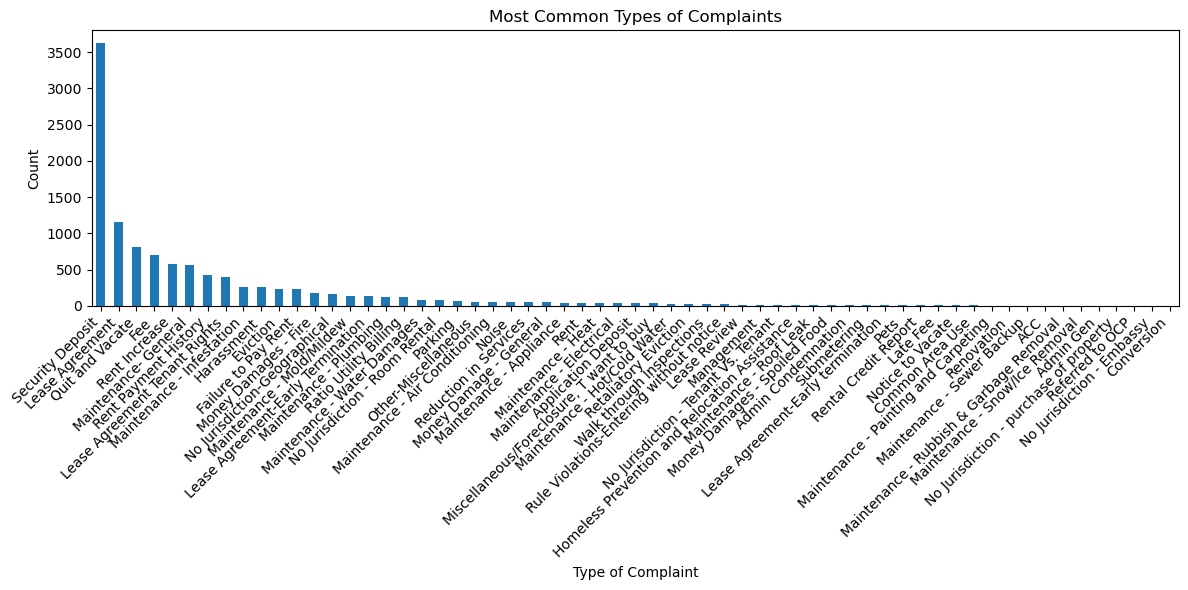

In [14]:
# 1. What are the most common types of complaints?

plt.figure(figsize=(12, 6))
housing_disputes['Type of Complaint'].value_counts().plot(kind = 'bar')
plt.title('Most Common Types of Complaints')
plt.xlabel('Type of Complaint')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

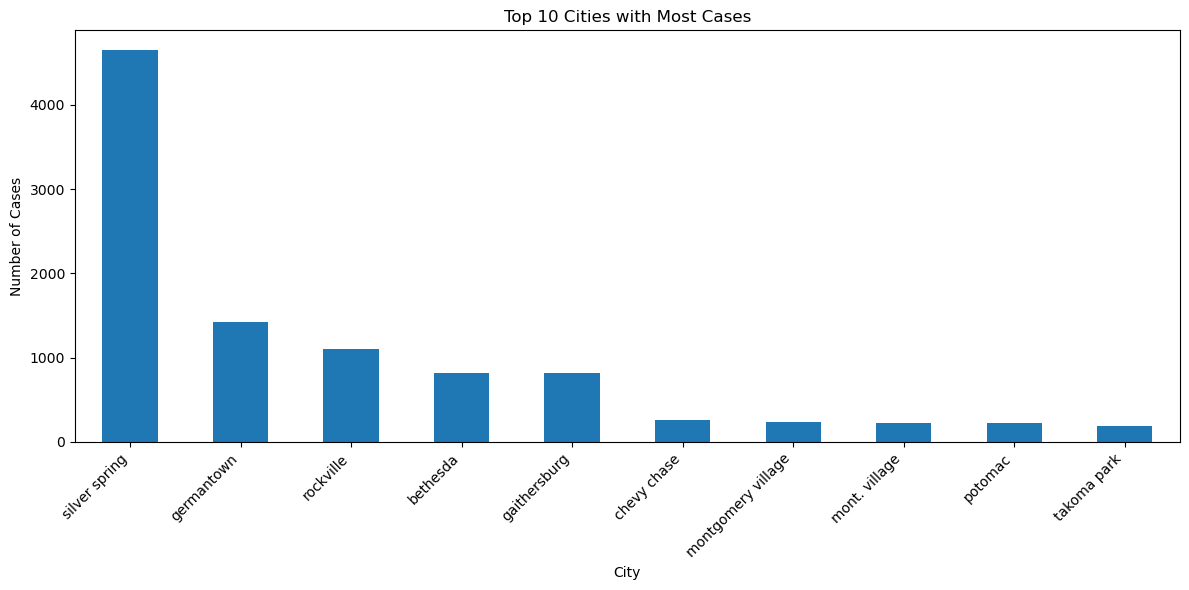

In [15]:
# 2. How are the cases distributed across different cities? 

plt.figure(figsize = (12, 6))
housing_disputes['City'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities with Most Cases')
plt.xlabel('City')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

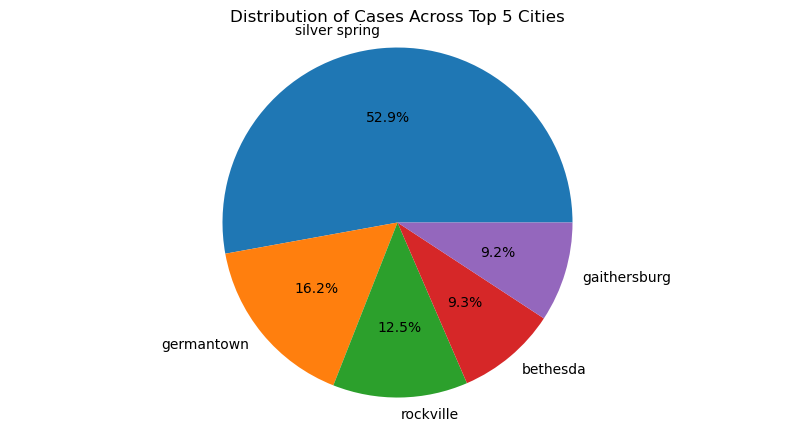

In [16]:
# 3. Distribution of cases across top 5 cities

# Count cases by city

city_counts = housing_disputes['City'].value_counts()

# Calculate percentage of total cases for each city

total_cases = len(housing_disputes)
city_percentages = (city_counts / total_cases) * 100

# Create a pie chart for the top 5 cities

plt.figure(figsize = (10, 5))
plt.pie(city_percentages.head(5), labels = city_percentages.head(5).index, autopct = '%1.1f%%')
plt.title('Distribution of Cases Across Top 5 Cities')
plt.axis('equal')
plt.show()

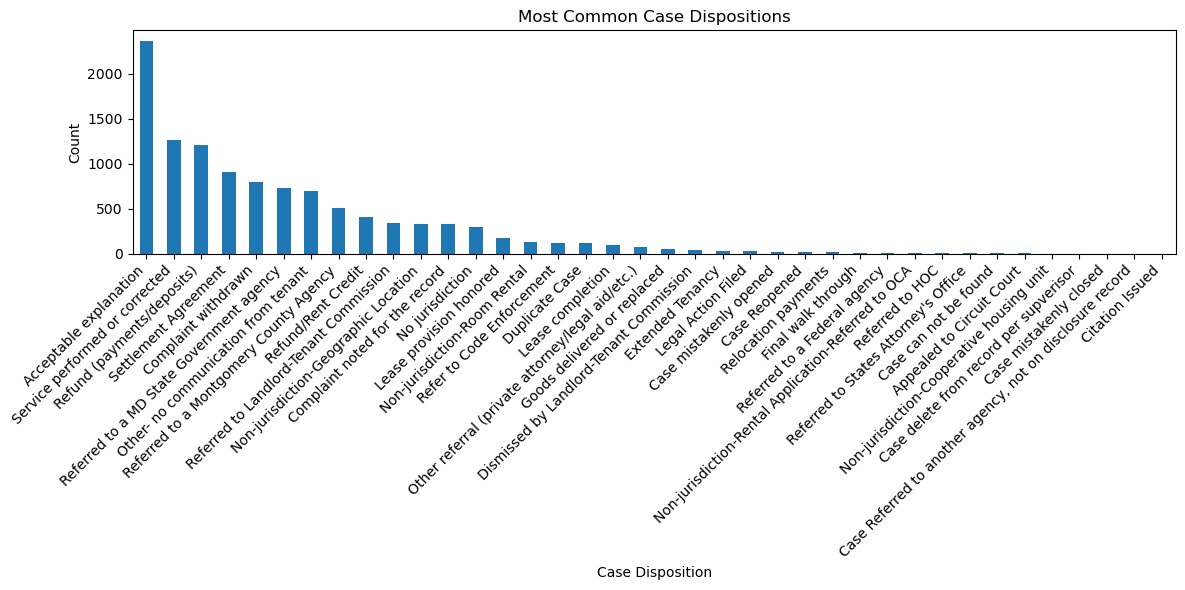

In [17]:
# 4. What are the most common case dispositions?

plt.figure(figsize = (12, 6))
housing_disputes['Case Disposition'].value_counts().plot(kind = 'bar')
plt.title('Most Common Case Dispositions')
plt.xlabel('Case Disposition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

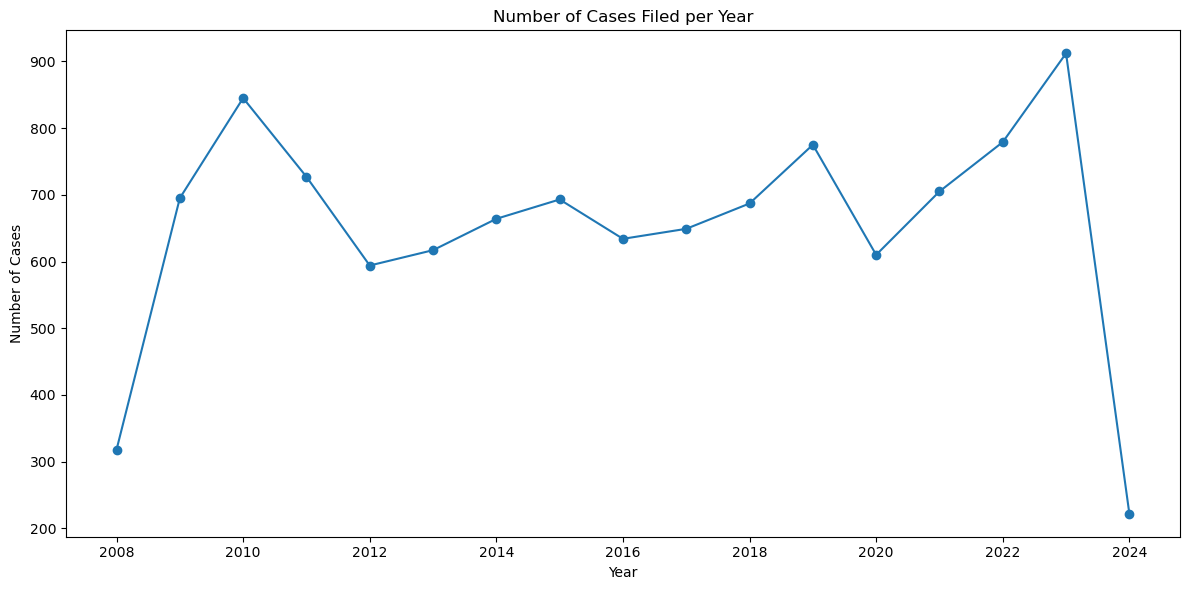

In [18]:
# 5. How has the number of cases changed over time?

housing_disputes['Year'] = housing_disputes['Date Filed'].dt.year
cases_per_year = housing_disputes['Year'].value_counts().sort_index()
plt.figure(figsize = (12, 6))
cases_per_year.plot(kind = 'line', marker = 'o')
plt.title('Number of Cases Filed per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.tight_layout()

In [19]:
# 6. Calculate the average case duration by case type

# First, let's calculate the case duration in days

housing_disputes['Case Duration'] = (housing_disputes['Date Closed'] - housing_disputes['Date Filed']).dt.days

# Secondly, let's calculate average duration for each case type

avg_duration = housing_disputes.groupby('Case Type')['Case Duration'].mean().sort_values(ascending=False)

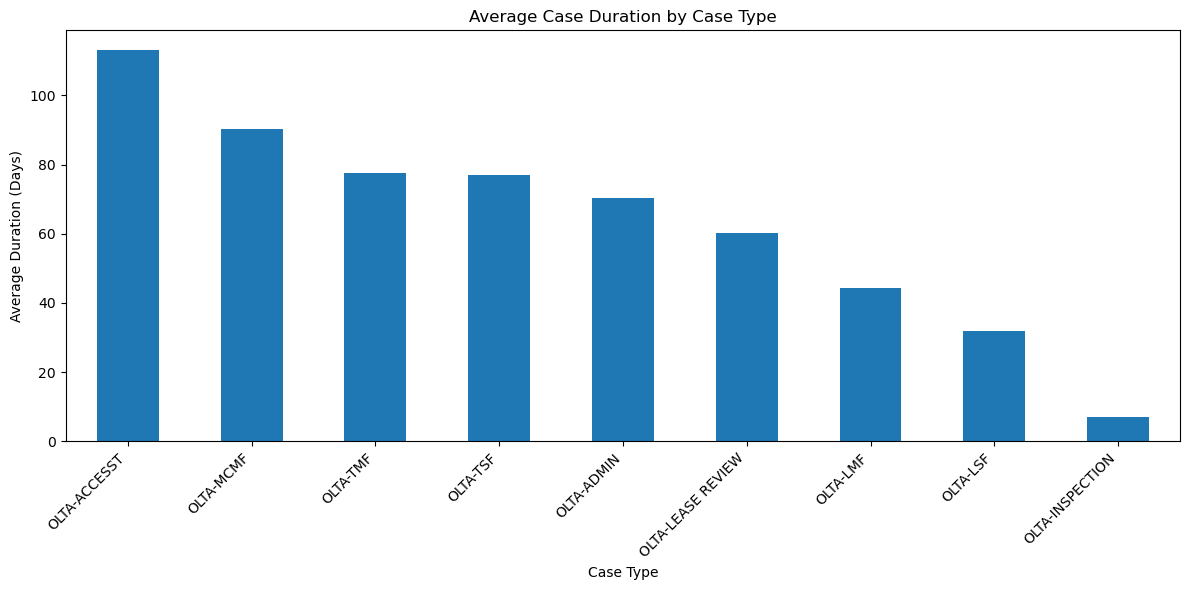

In [20]:
# Creating the chart for average case duration by case type

plt.figure(figsize=(12, 6))
avg_duration.plot(kind='bar')
plt.title('Average Case Duration by Case Type')
plt.xlabel('Case Type')
plt.ylabel('Average Duration (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [21]:
# 7.  Calculate overall average duration
overall_avg = housing_disputes['Case Duration'].mean()
print(f"\nOverall Average Case Duration: {overall_avg:.2f} days")


Overall Average Case Duration: 74.95 days


In [22]:
housing_disputes.to_csv('housing_disputes.csv', index = False)

**Insights From Analysis**

This analysis highlights the areas where tenants and landlords most frequently encounter conflicts. Understanding these common issues can help:

1. Landlords and property managers improve their practices to prevent these common disputes.
2. Tenants become more aware of their rights and potential issues to watch out for.
3. Policymakers focus on creating or refining regulations that address these specific problem areas.

Additionally, it's impoortant to also note that the most common case disposition is "Acceptable explanation," accounting for a significant portion of all cases.
"Service performed or corrected" and "Refund (payments/deposits)" are the next most frequent dispositions.
These show that: 
1. Many cases are resolved through explanations, corrections, or refunds, suggesting that a large number of disputes can be settled through communication or direct action.
2. The referrals to various agencies (MD State Government, Montgomery County Agency, Landlord-Tenant Commission), indicates a structured system for handling more complex or specialized cases.
3. A notable number of complaints are withdrawn, which could suggest resolution before formal proceedings or changes in circumstances.

Finally, this analysis provides valuable insights into how housing and landlord-tenant disputes are typically resolved in this jurisdiction. It shows the importance of communication, service correction, and refund processes in addressing tenant concerns. The data also shows that there's a well-established system for referring cases to appropriate agencies when needed. 
